In [1]:
import torch
import matplotlib.pyplot as plt
from utils import plaq_from_field
from nn_model_block import get_plaq_features

def visualize_features(config, selected_pos, selected_mu):
    """
    Visualize a 4x4 lattice and highlight selected plaquettes for a specific link
    
    Args:
        config: tensor of shape [2, 4, 4] containing link values
        selected_pos: tuple (x, y) for the selected link position
        selected_mu: direction (0 for horizontal, 1 for vertical)
    """
    # Calculate plaquette values
    plaq_vals = plaq_from_field(config)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot grid lines
    for i in range(5):
        ax.axhline(y=i, color='black', linewidth=1)
        ax.axvline(x=i, color='black', linewidth=1)
    
    # Plot horizontal links (direction 0)
    for i in range(4):
        for j in range(4):
            val = f"{config[0,i,j]:.2f}"
            color = 'darkblue' if (i == selected_pos[0] and j == selected_pos[1] and selected_mu == 0) else 'blue'
            width = 2 if (i == selected_pos[0] and j == selected_pos[1] and selected_mu == 0) else 1
            ax.arrow(i, j, 0.8, 0, head_width=0.1, head_length=0.1, fc=color, ec=color, linewidth=width)
            ax.text(i+0.4, j-0.2, val, ha='center', va='center')
    
    # Plot vertical links (direction 1)
    for i in range(4):
        for j in range(4):
            val = f"{config[1,i,j]:.2f}"
            color = 'darkred' if (i == selected_pos[0] and j == selected_pos[1] and selected_mu == 1) else 'red'
            width = 2 if (i == selected_pos[0] and j == selected_pos[1] and selected_mu == 1) else 1
            ax.arrow(i, j, 0, 0.8, head_width=0.1, head_length=0.1, fc=color, ec=color, linewidth=width)
            ax.text(i-0.2, j+0.4, val, ha='center', va='center')
    
    # Add plaquette values and highlight selected ones
    block_x = (selected_pos[0] // 4) * 4
    block_y = (selected_pos[1] // 4) * 4
    rel_x = selected_pos[0] % 4
    rel_y = selected_pos[1] % 4
    
    for i in range(4):
        for j in range(4):
            plaq_val = f"{plaq_vals[i,j]:.2f}"
            
            # Check if this plaquette is in the inner 3x3 block and not overlapping with the selected link
            is_selected = False
            if (i >= block_x and i < block_x + 3 and 
                j >= block_y and j < block_y + 3):
                if selected_mu == 0 and i != selected_pos[0]:
                    is_selected = True
                elif selected_mu == 1 and j != selected_pos[1]:
                    is_selected = True
            
            bg_color = 'yellow' if is_selected else 'white'
            ax.add_patch(plt.Rectangle((i, j), 1, 1, fill=True, alpha=0.2, color=bg_color))
            ax.text(i+0.5, j+0.5, f"P={plaq_val}", ha='center', va='center')
    
    ax.set_aspect('equal')
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.5, 4.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'4x4 Lattice Configuration\nSelected {"Horizontal" if selected_mu==0 else "Vertical"} Link at ({selected_pos[0]}, {selected_pos[1]})')
    plt.tight_layout()
    plt.show()
    
    # Get and print feature values
    features = get_plaq_features(plaq_vals.unsqueeze(0), 'cpu')
    print(f"\nFeatures for selected link (mu={selected_mu}, pos={selected_pos}):")
    print("Plaquette values and their features:")
    for i in range(6):  # 6 plaquettes
        cos_val = features[0, 2*i, selected_mu, selected_pos[0], selected_pos[1]]
        sin_val = features[0, 2*i+1, selected_mu, selected_pos[0], selected_pos[1]]
        plaq_val = torch.arctan2(sin_val, cos_val)  # Recover plaquette value from features
        print(f"Plaquette {i+1}: value={plaq_val:.4f}, cos={cos_val:.4f}, sin={sin_val:.4f}")

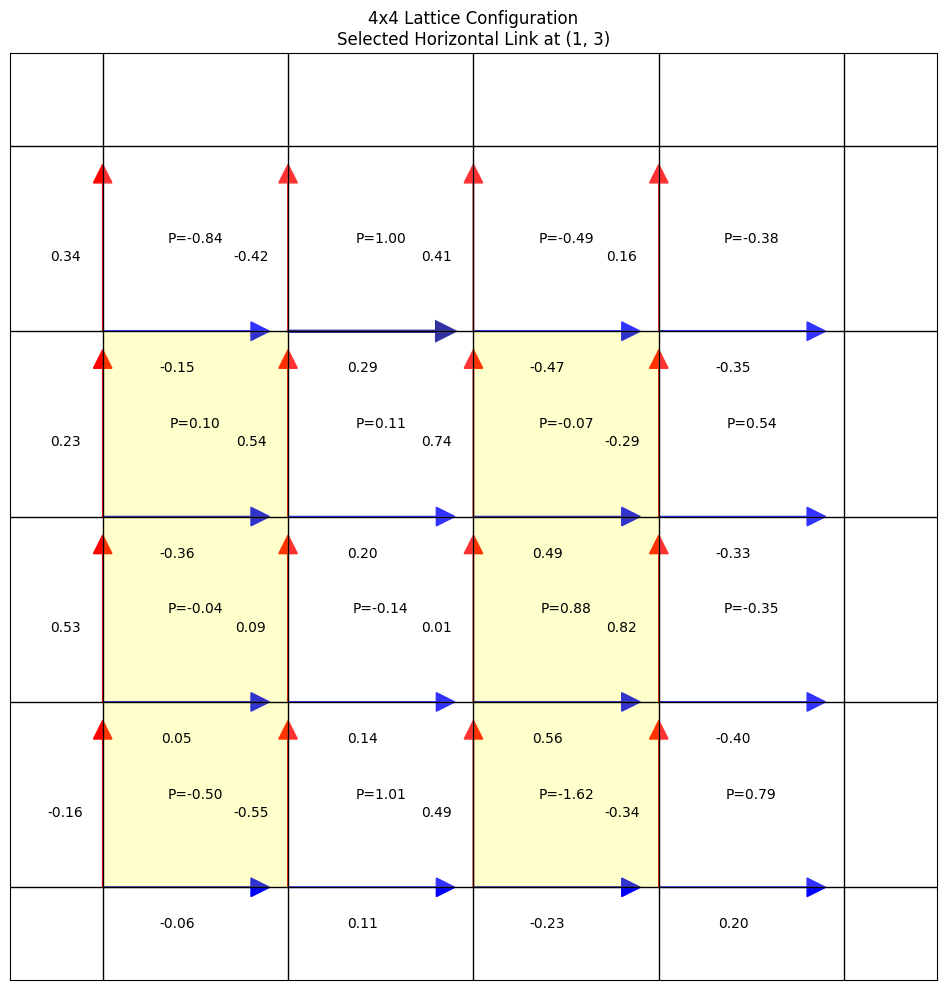


Features for selected link (mu=0, pos=(1, 3)):
Plaquette values and their features:
Plaquette 1: value=-0.4981, cos=0.8785, sin=-0.4778
Plaquette 2: value=-0.0431, cos=0.9991, sin=-0.0431
Plaquette 3: value=0.0979, cos=0.9952, sin=0.0977
Plaquette 4: value=-1.6175, cos=-0.0467, sin=-0.9989
Plaquette 5: value=0.8813, cos=0.6361, sin=0.7716
Plaquette 6: value=-0.0739, cos=0.9973, sin=-0.0738


In [2]:
# Create a random configuration
config = torch.randn(2, 4, 4) * 0.5

# Test for a specific link
selected_pos = (1, 3)  # Change these coordinates to test different links
selected_mu = 0        # Change between 0 and 1 to test different directions

visualize_features(config, selected_pos, selected_mu) 